# Mountain Car
An introduction to reinforement learning by Raafi Rahman

## Standard Q Learning (No Deep Learning)

### Setup
Some imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

Setup environment

In [2]:
env = gym.make("MountainCar-v0")

In [3]:
learning_rate = 0.1
discount = 0.95
episodes = 6001

show_every = 2000

epsilon = 0.5
start_decay = 1
end_decay = episodes // 2
decay = epsilon / (end_decay - start_decay)

In [4]:
print(env.observation_space.high)
print(env.observation_space.low)

[0.6  0.07]
[-1.2  -0.07]


In [5]:
discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size
print(discrete_os_win_size)

[0.09  0.007]


In [6]:
q_table = np.random.uniform(low = -2, high = 0, size = (discrete_os_size + [env.action_space.n]))
print(q_table.shape)
# print(q_table)

(20, 20, 3)


In [7]:
episode_rewards = []
aggregate_episode_rewards = {'ep': [], 'avg': [], 'min': [], 'max': []}

In [8]:
def get_discrete_state(state):
    discrete_state = (state[0] - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

Loop

0
Episode: 0, Avg: -11787.0, Min: -11787.0, Max: -11787.0


C:\Users\Raafi\AppData\Local\Temp\ipykernel_31248\189939111.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


2000
Episode: 2000, Avg: -338.663, Min: -4896.0, Max: -147.0
4000
Episode: 4000, Avg: -179.2085, Min: -873.0, Max: -111.0
6000
Episode: 6000, Avg: -158.4285, Min: -243.0, Max: -106.0
Done


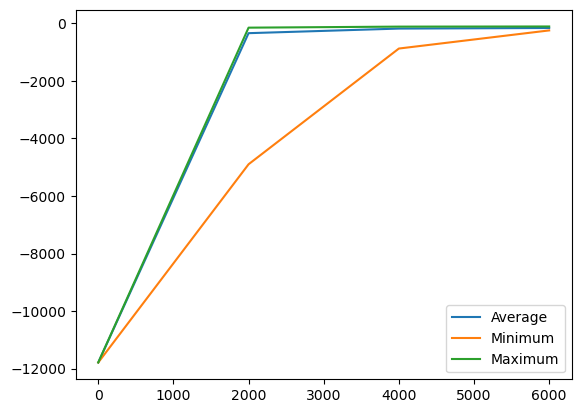

In [9]:
for episode in range(episodes):
    
    episode_reward = 0
    
    if episode % show_every == 0:
        print(episode)
    
    discrete_state = get_discrete_state(env.reset())

    done = False

    while not done:
        
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, info, observation = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state((new_state, {}))

        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]

            # This shit right here is the fucking heart of Q Learning. Remember it!
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            q_table[discrete_state + (action, )] = new_q

        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state
    
    if end_decay >= episode >= start_decay:
        epsilon -= decay
        
    episode_rewards.append(episode_reward)
    
    if not episode % show_every:
        average_reward = sum(episode_rewards[-show_every:]) / len(episode_rewards[-show_every:])
        aggregate_episode_rewards['ep'].append(episode)
        aggregate_episode_rewards['avg'].append(average_reward)
        aggregate_episode_rewards['min'].append(min(episode_rewards[-show_every:]))
        aggregate_episode_rewards['max'].append(max(episode_rewards[-show_every:]))
        
        print(f"Episode: {episode}, Avg: {average_reward}, Min: {min(episode_rewards[-show_every:])}, Max: {max(episode_rewards[-show_every:])}")
    
env.close()
print('Done')

plt.plot(aggregate_episode_rewards['ep'], aggregate_episode_rewards['avg'], label = "Average")
plt.plot(aggregate_episode_rewards['ep'], aggregate_episode_rewards['min'], label = "Minimum")
plt.plot(aggregate_episode_rewards['ep'], aggregate_episode_rewards['max'], label = "Maximum")
plt.legend(loc = 4)
plt.show()

### Testing

In [10]:
env = gym.make("MountainCar-v0", render_mode = "human")

In [11]:
env.reset()

(array([-0.54489404,  0.        ], dtype=float32), {})

In [12]:
for episode in range(episodes):
    
    if episode % show_every == 0:
        print(episode)
    
    discrete_state = get_discrete_state(env.reset())

    done = False

    while not done:
        action = np.argmax(q_table[discrete_state])
        new_state, reward, done, info, observation = env.step(action)
        new_discrete_state = get_discrete_state((new_state, {}))

        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]

            # This shit right here is the fucking heart of Q Learning. Remember it!
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)

            q_table[discrete_state + (action, )] = new_q

        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state
    
env.close()
print('Done')

0


C:\Users\Raafi\AppData\Local\Temp\ipykernel_31248\189939111.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


KeyboardInterrupt: 